In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # basic ploting
import seaborn as sns #advanced visualization
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/adult-income-dataset/adult.csv


In [3]:
data = pd.read_csv('/kaggle/input/adult-income-dataset/adult.csv')
data.head

<bound method NDFrame.head of        age     workclass  fnlwgt     education  educational-num  \
0       25       Private  226802          11th                7   
1       38       Private   89814       HS-grad                9   
2       28     Local-gov  336951    Assoc-acdm               12   
3       44       Private  160323  Some-college               10   
4       18             ?  103497  Some-college               10   
...    ...           ...     ...           ...              ...   
48837   27       Private  257302    Assoc-acdm               12   
48838   40       Private  154374       HS-grad                9   
48839   58       Private  151910       HS-grad                9   
48840   22       Private  201490       HS-grad                9   
48841   52  Self-emp-inc  287927       HS-grad                9   

           marital-status         occupation relationship   race  gender  \
0           Never-married  Machine-op-inspct    Own-child  Black    Male   
1      Marrie

In [4]:
data = data.replace('?','')
data= data.replace('',pd.NA).dropna()

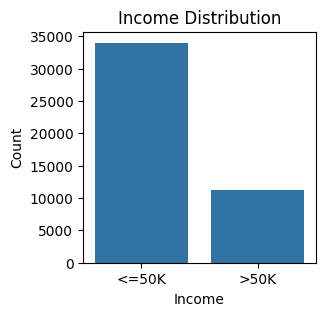

In [5]:
plt.figure(figsize=(3,3))
sns.countplot(x='income',data=data)
plt.title('Income Distribution')
plt.xlabel('Income')
plt.ylabel('Count')
plt.show()

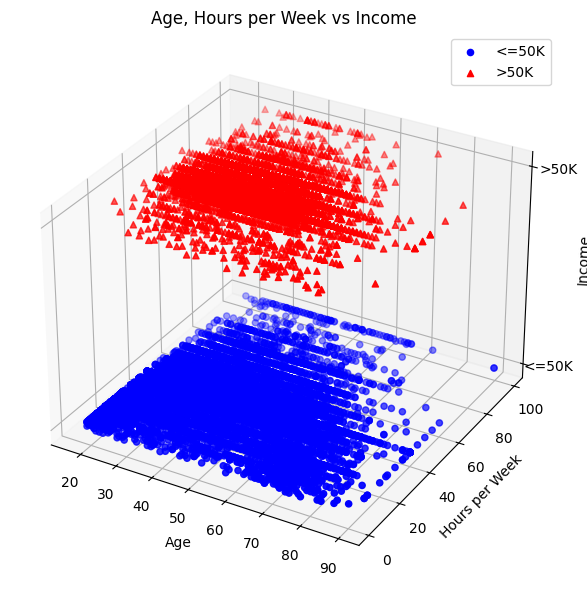

In [6]:
# age, hours-per-week Vs income
data = data[['age', 'workclass', 'fnlwgt', 'education', 'educational-num', 'marital-status', 'occupation', 'relationship', 'race', 'gender',
             'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']]
data['income_numeric'] = data['income'].apply(lambda x: 0 if x == '<=50K' else 1)
fig = plt.figure(figsize=(25, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data[data['income_numeric'] == 0]['age'],
           data[data['income_numeric'] == 0]['hours-per-week'],
           data[data['income_numeric'] == 0]['income_numeric'],
           c='b', marker='o', label='<=50K')
ax.scatter(data[data['income_numeric'] == 1]['age'],
           data[data['income_numeric'] == 1]['hours-per-week'],
           data[data['income_numeric'] == 1]['income_numeric'],
           c='r', marker='^', label='>50K')
ax.set_xlabel('Age')
ax.set_ylabel('Hours per Week')
ax.set_zlabel('Income')
ax.set_title('Age, Hours per Week vs Income')
ax.set_zticks([0, 1])
ax.set_zticklabels(['<=50K', '>50K'])
ax.legend()
plt.tight_layout()
plt.show()

In [7]:
def categorize_age(age):
    if age <= 18:
        return '0-18'
    elif 19 <= age <= 30:
        return '19-30'
    elif 31 <= age <= 50:
        return '30-50'
    elif 51 <= age <= 65:
        return '50-65'
    else:
        return '65+'

data['age_slab'] = data['age'].apply(categorize_age)

<Figure size 1000x600 with 0 Axes>

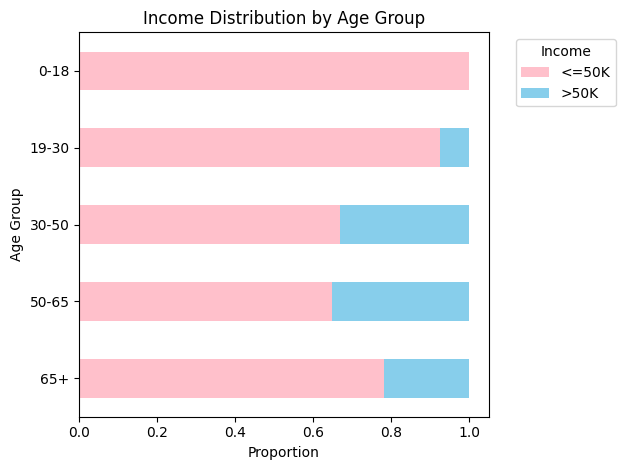

In [31]:
income_distribution = data.groupby('age_slab')['income'].value_counts(normalize=True).unstack().sort_index(ascending=False)
plt.figure(figsize=(10, 6))
income_distribution.plot(kind='barh', stacked=True, color=['pink', 'skyblue'])
plt.xlabel('Proportion')
plt.ylabel('Age Group')
plt.title('Income Distribution by Age Group')
plt.legend(title='Income', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

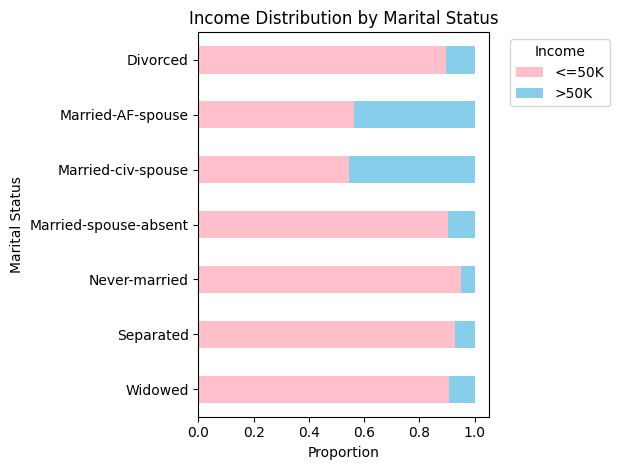

In [33]:
# marital-status Vs income
income_distribution = data.groupby('marital-status')['income'].value_counts(normalize=True).unstack().sort_index(ascending=False)
plt.figure(figsize=(10, 6))
income_distribution.plot(kind='barh', stacked=True, color=['pink', 'skyblue'])
plt.xlabel('Proportion')
plt.ylabel('Marital Status')
plt.title('Income Distribution by Marital Status')
plt.legend(title='Income', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [67]:
workclass_mapping = {
    'Federal-gov': 0,
    'Local-gov': 1,
    'Private': 2,
    'Self-emp-inc': 3,
    'Self-emp-not-inc': 4,
    'State-gov': 5,
    'Without-pay': 6
}

data['workclass_encoded'] = data['workclass'].map(workclass_mapping)

<Figure size 1000x600 with 0 Axes>

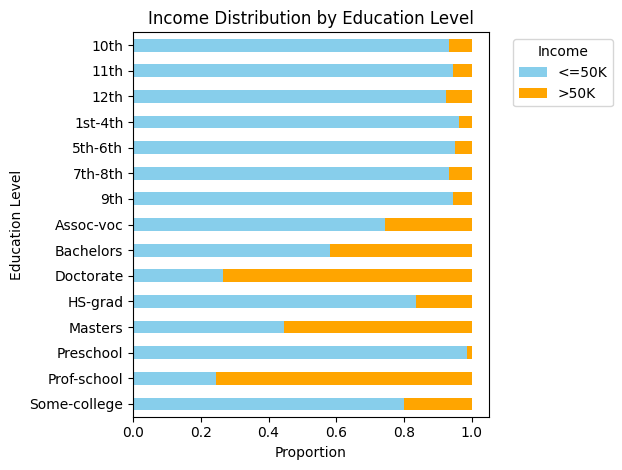

In [68]:
# Plot Income Distribution by Education level
income_distribution = data.groupby('education')['income'].value_counts(normalize=True).unstack().sort_index(ascending=False)
plt.figure(figsize=(10, 6))
income_distribution.plot(kind='barh', stacked=True, color=['skyblue', 'orange'])
plt.xlabel('Proportion')
plt.ylabel('Education Level')
plt.title('Income Distribution by Education Level')
plt.legend(title='Income', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [69]:
# Encode education
education_mapping = {
    'HS-grad': 0,
    'Some-college': 1,
    'Bachelors': 2,
    'Masters': 3,
    'Assoc-voc': 4,
    '11th': 5,
    '10th': 6,
    '7th-8th': 7,
    'Prof-school': 8,
    '9th': 9,
    '12th': 10,
    'Doctorate': 11,
    '5th-6th': 12,
    '1st-4th': 13,
    'Preschool': 14
   }

data['education_encoded'] = data['education'].map(education_mapping)

<Figure size 1000x600 with 0 Axes>

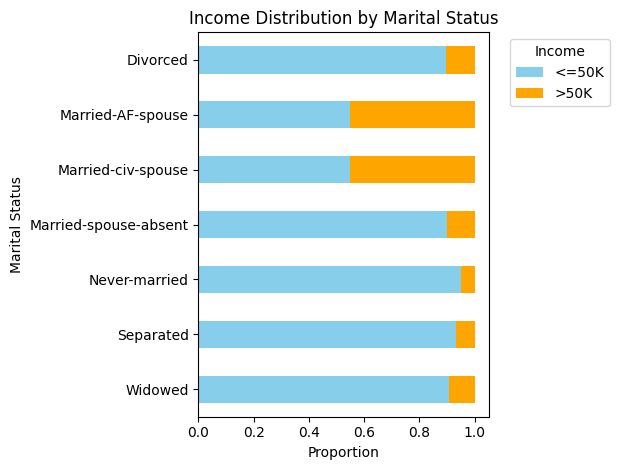

In [70]:
# marital-status Vs income
income_distribution = data.groupby('marital-status')['income'].value_counts(normalize=True).unstack().sort_index(ascending=False)
plt.figure(figsize=(10, 6))
income_distribution.plot(kind='barh', stacked=True, color=['skyblue', 'orange'])
plt.xlabel('Proportion')
plt.ylabel('Marital Status')
plt.title('Income Distribution by Marital Status')
plt.legend(title='Income', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [34]:
marital_mapping = {
    'Divorced': 0,
    'Married-civ-spouse': 1,
    'Never-married': 2,
    'Separated': 3,
    'Widowed': 4,
    'Married-spouse-absent': 5,
    'Married-AF-spouse': 6
   }

data['marital_encoded'] = data['marital-status'].map(marital_mapping)

<Figure size 1000x600 with 0 Axes>

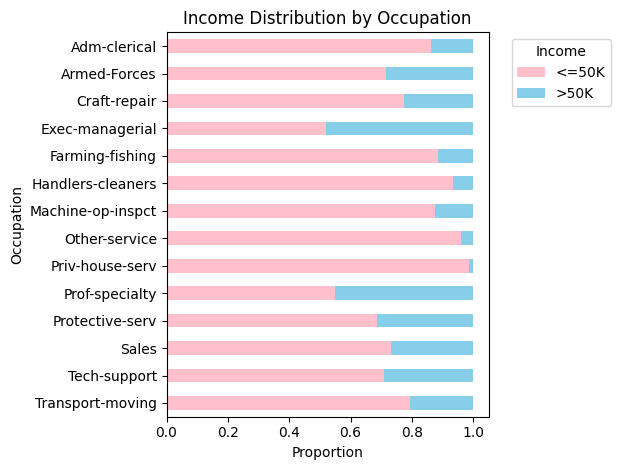

In [36]:
# occupation Vs income
income_distribution = data.groupby('occupation')['income'].value_counts(normalize=True).unstack().sort_index(ascending=False)
plt.figure(figsize=(10, 6))
income_distribution.plot(kind='barh', stacked=True, color=['pink', 'skyblue'])
plt.xlabel('Proportion')
plt.ylabel('Occupation')
plt.title('Income Distribution by Occupation')
plt.legend(title='Income', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [37]:
occupation_mapping = {
    'Craft-repair': 0,
    'Prof-specialty': 1,
    'Exec-managerial': 2,
    'Adm-clerical': 3,
    'Sales': 4,
    'Other-service': 5,
    'Machine-op-inspct': 6,
    'Transport-moving': 7,
    'Handlers-cleaners': 8,
    'Farming-fishing': 9,
    'Tech-support': 10,
    'Doctorate': 11,
    'Protective-serv': 12,
    'Priv-house-serv': 13,
    'Armed-Forces': 14
   }

data['occupation_encoded'] = data['occupation'].map(occupation_mapping)

<Figure size 1000x600 with 0 Axes>

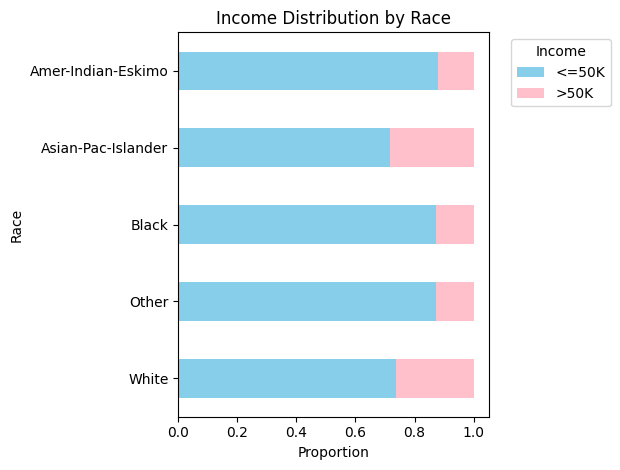

In [39]:
#race vs income
income_distribution = data.groupby('race')['income'].value_counts(normalize=True).unstack().sort_index(ascending=False)
plt.figure(figsize=(10, 6))
income_distribution.plot(kind='barh', stacked=True, color=['skyblue', 'pink'])
plt.xlabel('Proportion')
plt.ylabel('Race')
plt.title('Income Distribution by Race')
plt.legend(title='Income', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [41]:
# Encode race
race_mapping = {
    'White': 0,
    'Black': 1,
    'Asian-Pac-Islander': 2,
    'Amer-Indian-Eskimo': 3,
    'Other': 4
   }

data['race_encoded'] = data['race'].map(race_mapping)

<Figure size 800x500 with 0 Axes>

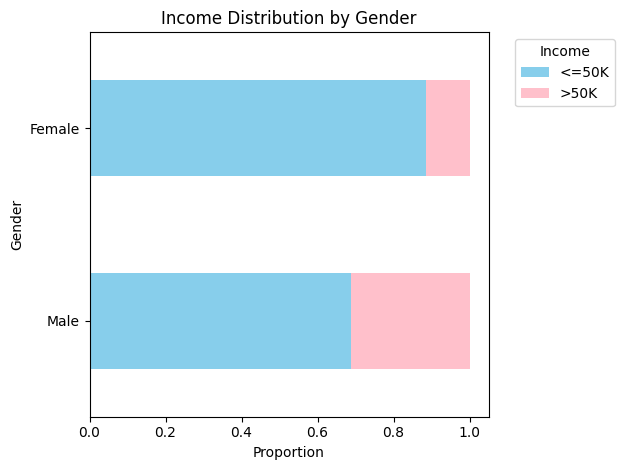

In [43]:
# gender Vs income
income_distribution = data.groupby('gender')['income'].value_counts(normalize=True).unstack().sort_index(ascending=False)
plt.figure(figsize=(8, 5))
income_distribution.plot(kind='barh', stacked=True, color=['skyblue', 'pink'])
plt.xlabel('Proportion')
plt.ylabel('Gender')
plt.title('Income Distribution by Gender')
plt.legend(title='Income', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [76]:
# Encode gender
gender_mapping = {
    'Male': 0,
    'Female': 1
   }

data['gender_encoded'] = data['gender'].map(gender_mapping)


<Figure size 1600x1900 with 0 Axes>

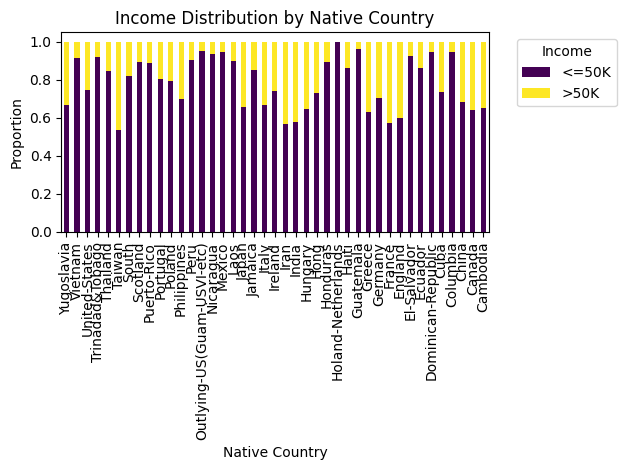

In [77]:
income_distribution = data.groupby('native-country')['income'].value_counts(normalize=True).unstack().sort_index(ascending=False)
plt.figure(figsize=(16, 19))
income_distribution.plot(kind='bar', stacked=True, colormap='viridis')
plt.xlabel('Native Country')
plt.ylabel('Proportion')
plt.title('Income Distribution by Native Country')
plt.legend(title='Income', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [78]:
# Encode native-country
country_mapping = {
    'United-States': 0,
    'Mexico': 1,
    'Philippines': 2,
    'Germany': 3,
    'Puerto-Rico': 4,
    'Canada': 5,
    'India': 6,
    'El-Salvador': 7,
    'Cuba': 8,
    'England': 9,
    'China': 10,
    'Jamaica': 11,
    'South': 12,
    'Italy': 13,
    'Dominican-Republic': 14,
    'Japan': 15,
    'Guatemala': 16,
    'Vietnam': 17,
    'Columbia': 18,
    'Poland': 19,
    'Haiti': 20,
    'Portugal': 21,
    'Iran': 22,
    'Taiwan': 23,
    'Greece': 24,
    'Nicaragua': 25,
    'Peru': 26,
    'Ecuador': 27,
    'Ireland': 28,
    'France': 29,
    'Thailand': 30,
    'Hong': 31,
    'Cambodia': 32,
    'Trinadad&Tobago': 33,
    'Yugoslavia': 34,
    'Outlying-US(Guam-USVI-etc)': 35,
    'Laos': 36,
    'Scotland': 37,
    'Honduras': 38,
    'Hungary': 39,
    'Holand-Netherlands': 40
}

data['native-country_encoded'] = data['native-country'].map(country_mapping)


/tmp/ipykernel_55/364382245.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='income', y='hours-per-week', data=data, palette='muted')


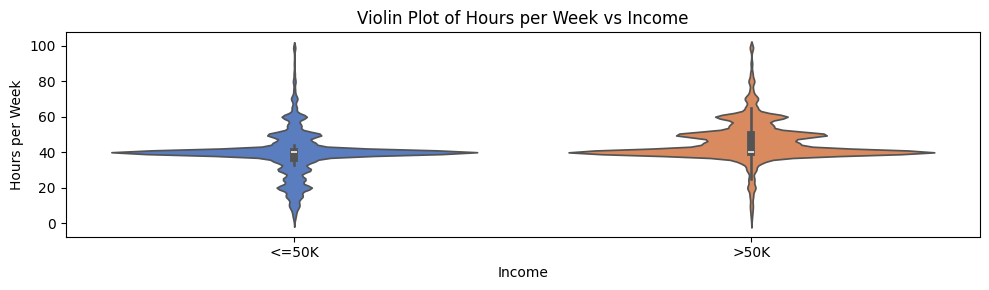

In [79]:
# hours-per-week Vs income
plt.figure(figsize=(10, 3))
sns.violinplot(x='income', y='hours-per-week', data=data, palette='muted')
plt.xlabel('Income')
plt.ylabel('Hours per Week')
plt.title('Violin Plot of Hours per Week vs Income')
plt.xticks([0, 1], ['<=50K', '>50K'])
plt.tight_layout()
plt.show()



In [80]:
data = data.dropna()

In [81]:
# Seperating features & label
X = data[['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss', 'hours-per-week', 'workclass_encoded', 'education_encoded', 'marital_encoded', 'occupation_encoded', 'race_encoded', 'gender_encoded', 'native-country_encoded']]
y = data['income']


In [82]:
X.head()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,workclass_encoded,education_encoded,marital_encoded,occupation_encoded,race_encoded,gender_encoded,native-country_encoded
0,25,226802,7,0,0,40,2,5,2,6,1,0,0
1,38,89814,9,0,0,50,2,0,1,9,0,0,0
3,44,160323,10,7688,0,40,2,1,1,6,1,0,0
5,34,198693,6,0,0,30,2,6,2,5,0,0,0
7,63,104626,15,3103,0,32,4,8,1,1,0,0,0


In [84]:
# Splitting into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [85]:
# Apply Standard Scaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [86]:
# Initialize Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Train the model
rf_classifier.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [87]:
# Predict on the test set
y_pred = rf_classifier.predict(X_test_scaled)

In [89]:

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")


Accuracy: 0.8482


In [90]:

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

       <=50K       0.88      0.92      0.90      6645
        >50K       0.72      0.61      0.66      2098

    accuracy                           0.85      8743
   macro avg       0.80      0.77      0.78      8743
weighted avg       0.84      0.85      0.84      8743

